In [1]:
from IPython.display import Image

# Comparison of Machine Learning Algorithms with Microbiome dataset
---


## Brian Nohomovich and Nat Hawkins
### 21 April, 2018

### Abstract

Acute gastroenteritis is a major disease burden in the United States and the world over. More than 179 million people will have gastroenteritis in the United States each year. Previous studies have identified changes (dysbiosis) in the microbiome of patients with gastroenteritis and associated them with disease severity. The traditional methodology to study the microbiome is time-consuming, a lack of standardized analysis and requires a level of expertise. Machine learning algorithms have not been routinely used in microbiome data analysis. However, they offer a lot of utility in being able to answer complex questions by accessing and implementing a working knowledge of more data than can be traditionally compared all at once by hand. The algorithms offer a way of teaching a computer to formulate its own diagnosis parameters for predicting outcome classes based on features, which is largely applicable to microbiome data. Further, there is no recommendation on what approach to utilize. Here we present a standardized approach using machine learning algorithms that does not require a sophisticated level of expertise and can be run on any microbiome dataset if formatted appropriately. We sought to classify the microbial community pertrubations associated with gastroenteritis and examine how our algorithms compared to the predicted dysbiosis in the literature. Our results indicate that machine learning algorithms can be utilized to classify health status of individuals based on microbiome data and clinical presentation.

### Introduction

Gastroenteritis is a major cause of death and debilitation worldwide. 179 million acute cases of gastroenteritis occur in the United States each year (1). Bacterial agents are only identified in 50% of these cases (2). In fact, recent studies suggest that culture-positive identification may be lower. A recent study of 196 hospitalized cases found that only 10% were culture-positive for a causative agent (3). To date, culturing bacteria remains the gold standard of pathogen identification and treatment options. The Human Microbiome Project (4) was integral in development of metagenomic approaches. Previous findings involving metagenomics with 16s sequencing data have identified elevations in Proteobacteria in acute gastroenteritis patients (5). Proteobacteria is a phylum that has the pro-inflammatory family Enterobacteriaceae. Enterobacteriaceae consist of major enteric pathogens like Escherichia, Klebsiella, Salmonella, and Campylobacter. Findings of elevated Proteobacteria and inflammation have been found in numerous diseases including infections (6–8) and autoimmune disorders (9–12). These findings define a model of dysbiosis (alteration) of the microbiome in a disease state (13). Sequencing the 16s region is only capable of identifying metagenomes at the genus level. Directly identifying causative agents at the species or strain level is necessary to define the disease process with higher precision and identify therapeutic targets. To date, utilizing machine learning for analyzing metagenomic data with corresponding metadata has been rarely attempted. A large-scale study utilized 2424 publicly available metagenomic samples from eight studies and found that their model had good predictive value and identified species of bacteria associated with illness (14). The species of bacteria identified both confirmed and contrasted previous metagenomic studies. We propose using a metagenomic dataset to investigate various machine learning algorithms (15). The approach is to clean the data, apply machine learning algorithms and compare to the current standards.

### Data and Methods

An active surveillance system was created through the Michigan Department of Human Health Services (MDHHS) Bureau of Laboratories to identify patients with enteric infections caused by Campylobacter, Salmonella, Shigella and Shiga toxin producing E. coli (STEC), as described (5). Metadata was collected from the patient at the time of submission and consists of symptoms, exposure history, antibiotic history, diet history and demographics. Over 1000 samples were collected in the study. In this proposal, 9 samples will be used consisting of individuals in the healthy, sick and follow-up states. The bacterial count data was prepared by processing the stool samples. Stool samples received from MDHHS were homogenized and centrifuged upon arrival; aliquots were stored in triplicate at -80 °C. DNA was extracted, and a single library pool was created for sequencing. Quality control of the library pool was confirmed with qPCR and DNA quantity. The library was sequenced with Illumina hiseq, and fastq files of raw reads were generated. Adaptors and low-quality reads will be removed using Trimmomatic v0.32 (20). FastQC (21) is used to read the Fastq files and generate a quality control report including poor quality reads, adaptors, and biases. Reads passing quality control (per base sequence quality > 30) are stripped of human reads by aligning to a database of the 1000 human refseq genomes from NCBI using bowtie2 (22) and samtools (23) to remove reads that match. Reads will be assembled with IDBA_UD (24). Reads and contiguous sequences (contigs) will be clustered at 97% identity over 90% length using CD-hit (19) to remove duplicates. Reads will be mapped to contigs with BWA (25). Reads will be annotated via blastx (26) against a local refseq (27) virus database using an e-value threshold of < 10-5 and 70% query coverage. MEGAN (28) will parse the local blast results. Unannotated contigs will be annotated using Kraken (29). Custom python scripts will merge the taxonomical and read counts for all contigs and samples. The dataset has features including biological and viral counts as well as clinical and lifestyle focused variables.

The goals of this project are to construct computational models to better understand the key characteristics of patient’s condition and use new information to predict a patient’s health status. We propose using a select few types of computational models. First, we will use a classification method that uses the microbiological data (counts of viral and bacterial components in a patient’s sample) and some clinical features (such as symptoms) to construct a model capable of making predictions when introduced to new data. The classification method that we will be using is the Random Forest Classifier (16). The Random Forest Model is based on decision trees. Features are selected at random from the dataset and serve as nodes for the decision tree. The algorithm then sets some threshold for this feature by which the data can be divided into new branches. A new feature is then selected, and the process continues. In the end, the algorithm has a chain of logic that it can follow to distinguish one class from another. In the case of our data, we will we be building a forest of decision trees that looks at the counts of bacterial and viral components as well as clinical features and use those values to be able to classify what condition a patient is in.


The regression model that we will be using in our analysis is Linear Regression. However, linear regression is used to create a mathemtical formulation for predicting new outputs based on inputs and not for discrete classifications. For this reason, we are using a support vector machine with a linear kernel to create functional boundaries used to distinguish classification regions from one another. The exact computational method being used is the OneVsRestClassfifer in scikit-learn. This method fits one classifier per class but fits it against every other class, which can give a general picture of the class based on the classifier, but also allow for robust multi-class classification. This algorithm operates by performing an ordinary least squares minimization but can be adapted to higher dimensional dataset. The advantage to using both methods in our analysis is that we will be able to extract feature importance from the models using the Random Forest Model,  a feature which is not so readily available with Linear Regression. The importance of a feature is determined by the weight of a feature in determining the outcome of the model. A more general definition pertaining specifically to the Random Forest Classifier is how likely is the feature to serve as a node after which point the data has been distinguished. Using this ability to extract feature importance, we will look at which features are most important in determining the outcome label of a patient. This serves as the primary goal for our project: which features can we identify as being most important from the dataset from a biological perspective in treating and identifying the risk of patients. Since Proteobacteria have been shown to have high abundance in patients with acute gastroenteritis we hypothesize that Proteobacteria will have a high feature importance. In examining this type of data in the future, we would also like to make some recommendations as to which type of analysis/model should be used. 

We are implementing a Logistic Regression model into our analysis as well. The reason behind this is Logistic Regression is often used for data in which the dependent variable is categorical in nature. In instances of multi-class classification, scikit-learn's Logistic Regression function actually calls the OneVsRestClassifier algorithm in order to handle the categorical classification. This is currently a standard method in this field for analyzing microbiome data (15), and we would like to include it in our work as well to see what results we can get from it.

We will use the Random Forest Classifier to extract feature importances, and our Linear SVM model and Logistic regression model to get some further predictive power, but we will compare both against the outcome of a clustering method, specifically K-Means, to see which algorithm the best job of predicting a patient’s health. The reason why we are incorporating clustering into this is to see if there is any spatial form to the data that lends itself to prediction, and thus, another tool to be used in diagnosis. We will be comparing these four types of methods to see how their performances differ when doing this kind of analysis. To compare these methods, we will be splitting the data using Scikit-Learn’s train_test_split function. This function randomly samples our dataset to create two datasets. One, rightfully called the training dataset, is a subset used to build the model and train it to identify how the features of each sample lead to that sample’s labelling. The test dataset is then used to evaluate the newly built model. Since we will know what the health labels of the patients are, then we compare what the model predicts with what the official diagnosis is. The model will then be evaluated based using metrics such as the area under the receiver operating characteristic curve, or AUC, confusion matrices, summary tables, and some measures for evaluating agreement between labeling such as the adjusted rand index. To improve consistency and robustness of our models, we will also use cross validation and debiasing in training our models.

For each method, confusion matrices and classification summaries will be calculated as well as AUC scores for each of the categorical outputs.

Our goal is to not invent new computational methods for analyzing this kind of data, but prove that these methods can be applied to microbiome data.

### Results and Discussion

**Linear Support Vector Machine**

The linear support vector machine does a good job of properly predicting the health status of a patient in the test data. The AUC for the _Case_ label was 0.95 and with the AUC for _Control_ and _Follow_ being closer to 0.85.

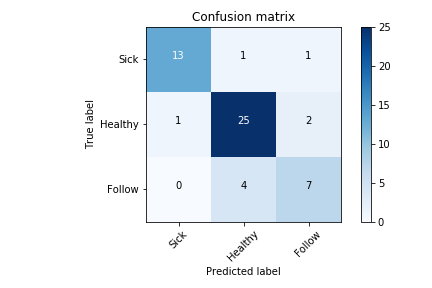

In [2]:
Image("../results/lin_svm.png")

```
Figure 1. Confusion Matrix of Linear Support Vector Machine.
This figure identifies the samples in the test set and identifies their predicted and real values. For instance, their are 15 "Sick" samples in the test dataset. 13 of them are predicted correctly and 2 are predicted wrong (predicted as 1 healthy and 1 follow-up). 
```


```
AUC Case: 0.95
AUC Control: 0.8793
AUC Follow: 0.8378
```

**Random Forest Classifier**

Our random forest model predicts the patient's health status well, but comparatively less well than the Linear SVM. No statistics were run to compare the output scores to determine significance. However, the _Case_ AUC is 0.92 and the the _Control_ and _Follow_ AUC's are around 0.80. The interesting result here comes from the feature importances. The most important feature was _Fever_, followed by _Proteobacteria_. From the literature, we expected _Proteobacteria_ to be a very important feature because it is a key determining factor in making a diagnosis. Next is _No Symptoms_, which is important because the definition of not being a _Case_ is to be symptom free, so the model identifies this as being important in making its classifications. Folllowing that is _Fermicutes_, which also based on the literature, is a bacteria that is present in an individual when they have a healthy GI track. The main takeaway from this being that the model has identified the bacteria present when someone is "sick" and someone is "healthy" as being important for making classifications. This aligns with what we expected in our results from the literature.

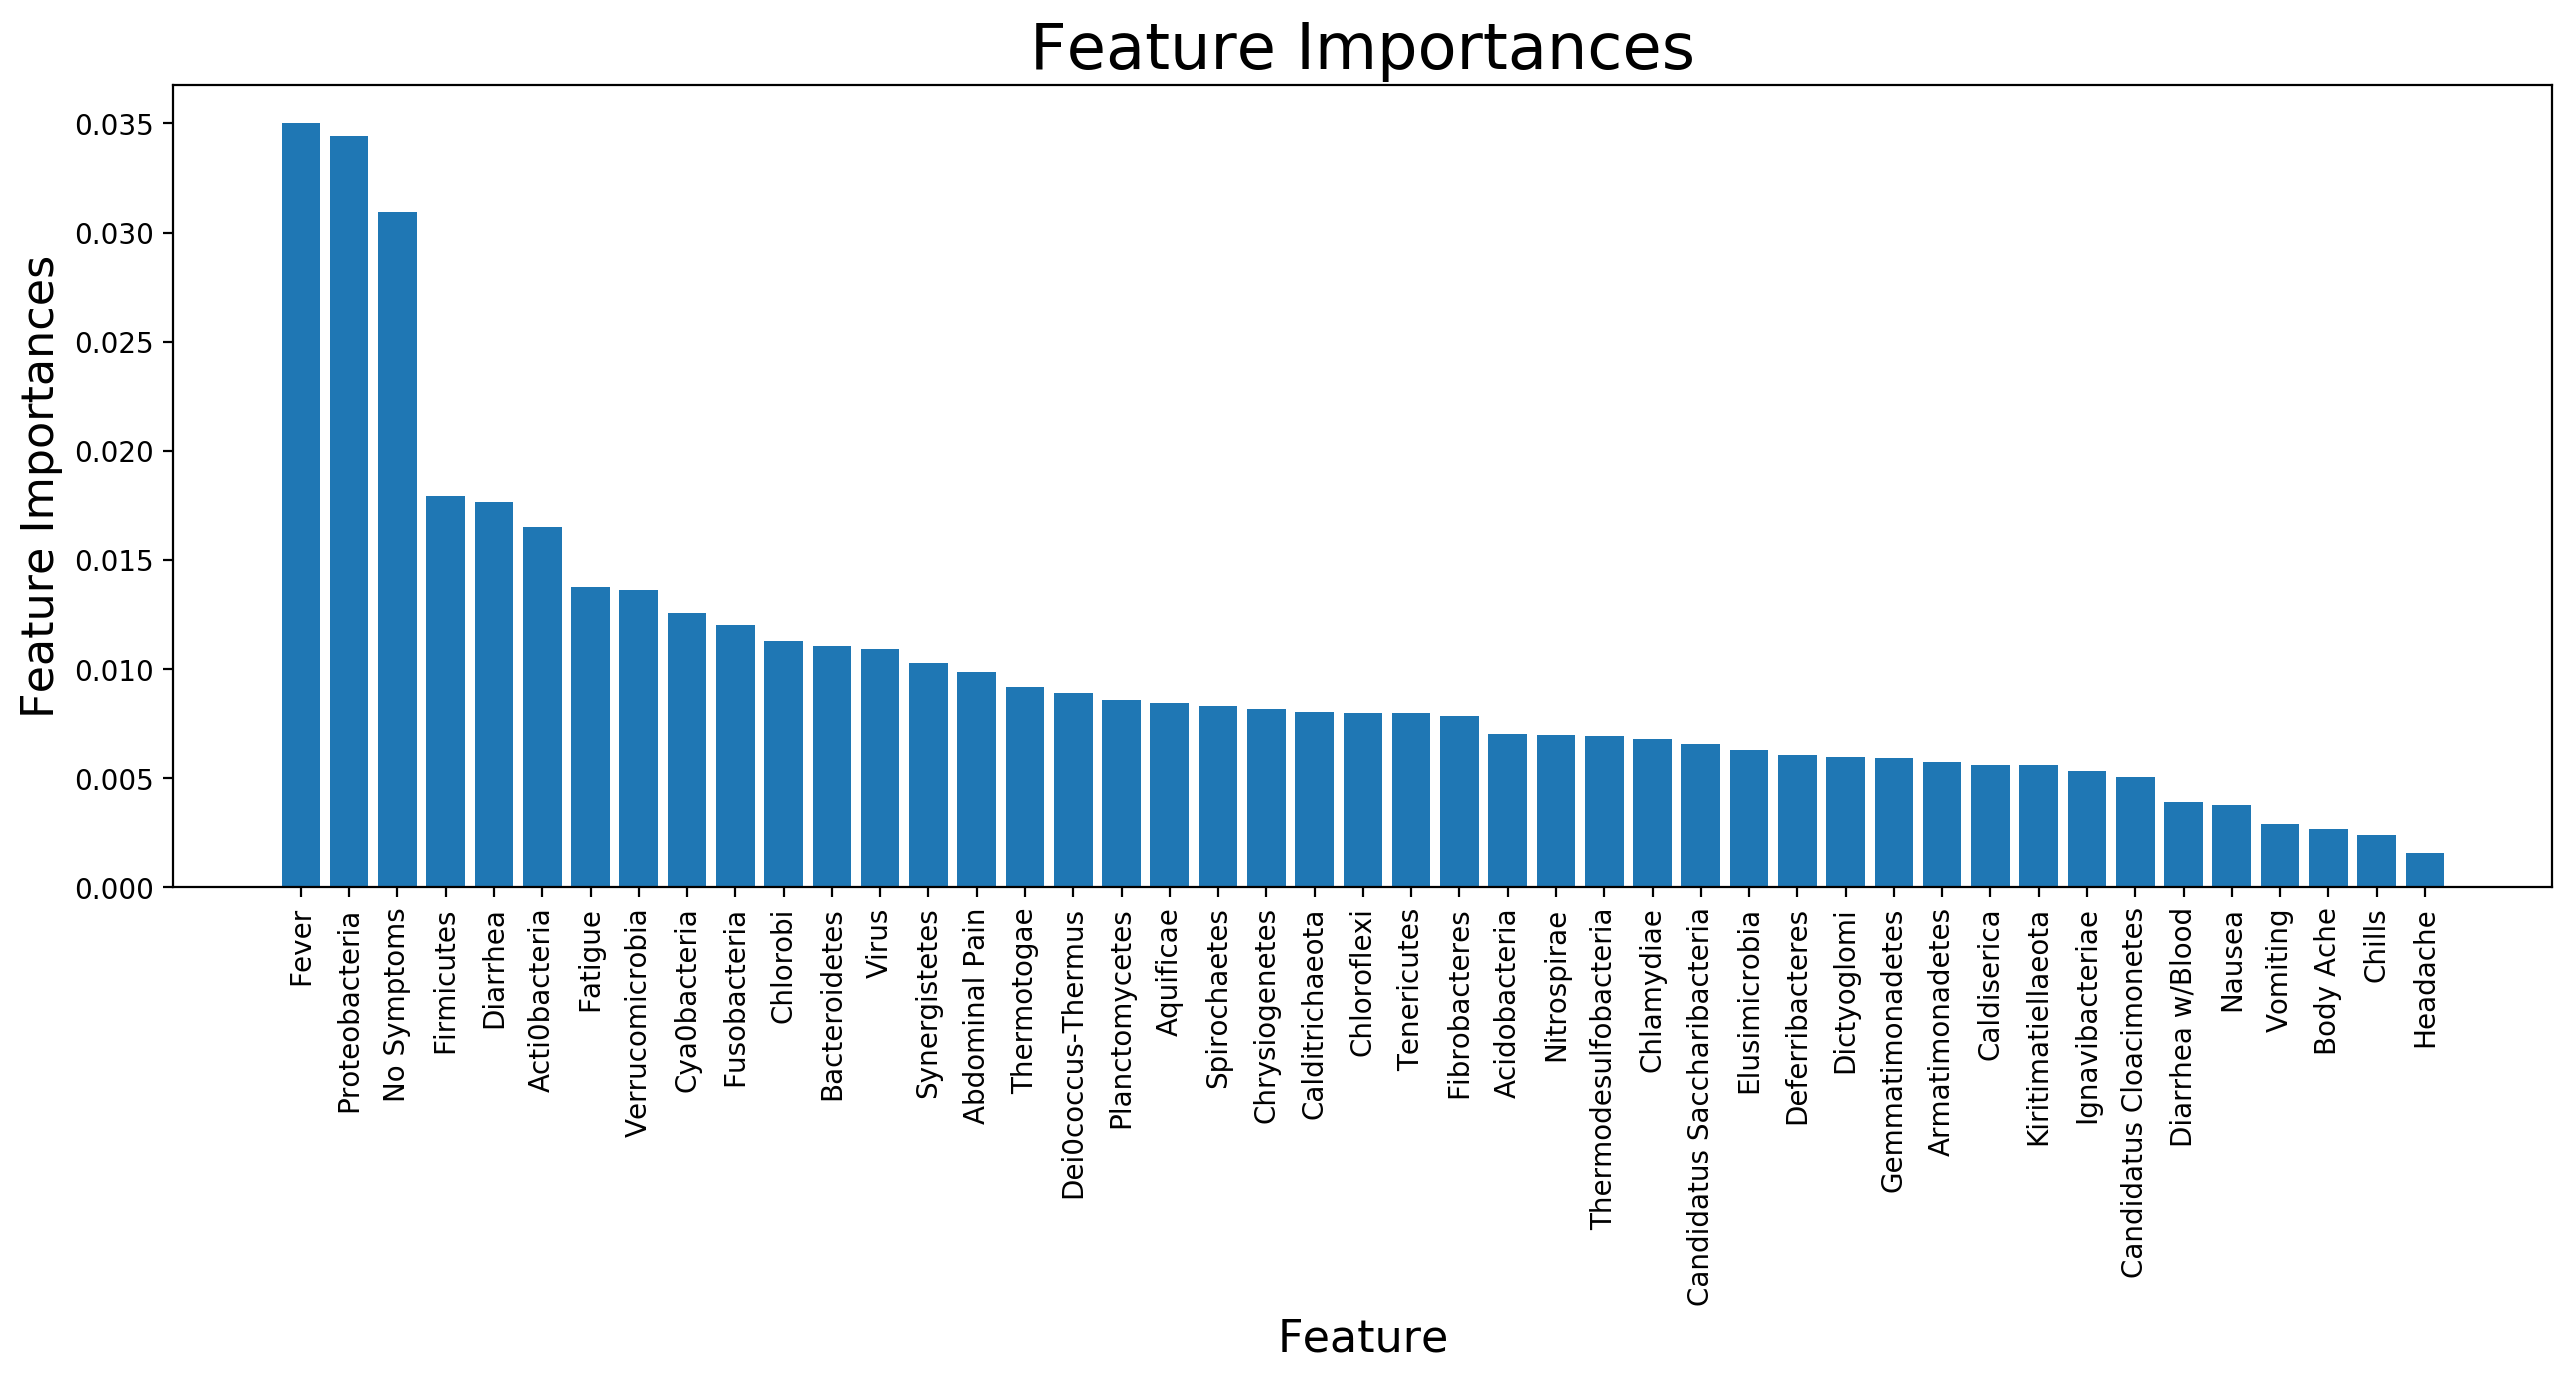

In [4]:
Image("../results/full_w_clinical_importances.png")

```
Figure 2. Feature Importances as determined by Random Forest Classifier.
This figure identifies Fever, Proteobacteria and No Symptoms as the top 3 most important features. Fever and Proteobacteria abundance elevation was present in the vast majority of cases. No symptoms was present in most of the controls but not in the follow-up. The No symptom feature is probably how the classified distinguishes follow-up from control states.
```

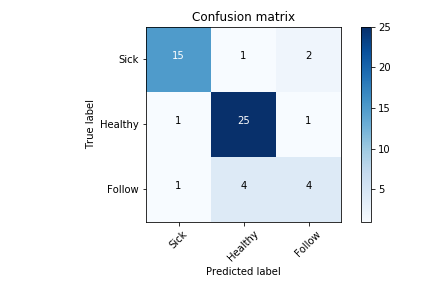

In [5]:
Image("../results/random_forest.png")

```
Figure 3. Confusion Matrix of Random Forest Classifier results.
This figure identifies the samples in the test set and identifies their predicted and real values. For instance, their are 27 "Healthy" samples in the test dataset. 25 of them are predicted correctly and 2 are predicted wrong (predicted as 1 sick and 1 follow-up). 
```

```
AUC Case: 0.9221
AUC Control: 0.8316
AUC Follow: 0.7784
```

**Logistic Regression**

Logistic Regression had comparatively high scores for AUC, similar to that of the Linear SVM. As this is a staple method in the field right now, we expected this to have comparatively high results.

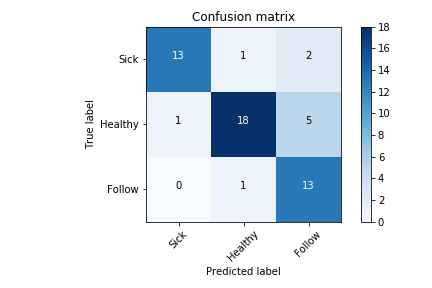

In [6]:
Image("../results/log_reg.png")

```
Figure 4. Confusion Matrix of Logistic Regression.
Logistic regression is a standard model used in microbiome analysis. This figure identifies the samples in the test set and identifies their predicted and real values. For instance, their are 14 "Follow-up" samples in the test dataset. 13 of them are predicted correctly and 1 are predicted wrong (predicted as 1 healthy). This model had the best AUC compared to the other methods so far. 
```

```
AUC Case: 0.9525
AUC Control: 0.8819
AUC Follow: 0.8503
```

It should be noted that for all models, the highest scoring AUC was for the _Case_ patients. From an ethical perspective, this is a desired outcome. We want to be able to build robust models that are capable of properly identifying when someone is sick and requires clinical attention. It's the ethical debate that a false positive is much better than a false negative. We don't want to send someone home saying that they aren't sick when in reality they need attention before their condition progresses. In that manner, all of these models do a good job of identifying the sick patients to a high degree. The _Control_ and _Follow_ are less accruately identified, with _Follow_ being the lowest consistently. This is an artifact of the data. The _Follow_ patients were suppoed to report sometime after they had been treated, but that timeframe was ambiguous. Some patients didn't report back for a couple of weeks, while others reported back a few days later. For that reason, there is a lack of consistency across the patients' conditions, and the models all pick up on this and have some trouble clearly defining the boundaries by which they are classifying the patients with.

**Comparison Between Various Methods**

We wanted to test not only the agreement between these methods with KMeans, but with one another as well. The adusted rand index ranges from -1 to 1, with -1 indictaing perfect backwards labeling (inverse labeling) where everything was correctly predicted but in the aboluste wrong order. For example, every _Case_ patient is predicted as _Control_, every _Control_ is predicted _Follow_, and every _Follow_ predicted _Case_. A rand index of 0 indicates no agreement, or noisey classification comparison. A 1 is a perfect agreement. In comparing our methods to KMeans, the scores are relatively low, but the highest rand index is seen in our comparisons with k = 3. This makes sense because we have three unique classes in our data, so KMeans is able to correctly identify this based on spatial distributions. However, the agreement is not very high, which indicates that there is a lot of disagreement between how KMeans assigns the patients to centroids and how the models draw dividing regions of classification with the patients. We recommend that KMeans not serve as the main mode for analysis but a verification step. The other result that this analysis gives us is the agreement between methods. The only thing that changes with the increasing k values is the number of clusters in the KMeans algorithm. That means that when doing these comparisons, we are also checking to see whether the other methods have a consistent level of agreement with one another as we are just training it with a different training set. This can be considered an extension of cross-validation where we are checking consistency. The Logistic Regression method and the Linear SVM have the highest level of agreement across the board. This is not unexpected because the Logistic Regression Method uses the OneVsRestClassifier algorithm when the classification becomes a multiclass problem. The scoring here reflects that commonality between then. Looking across the board, these methods don't individuall agree very well with one another (e.g. Log. Reg. and RFC only have a 0.45 average rand index, which is not very good). This could be because of the noise associated with the _Control_ and _Follow_ patients. Overall though, these numbers verify consistency in our methods.

| Methods Being Compared  | k = 2 | k = 3 | k = 4 | k = 5 | k = 6 |  k = 7 | k = 8 | k = 9 | k = 10 |
|-------------------------|-------|-------|-------|-------|-------|--------|-------|-------|--------|
| Log. Reg. and RFC       | 0.42  | 0.47  | 0.47  | 0.47  | 0.49  | 0.45   | 0.52  | 0.43  | 0.50   |
| RFC and Lin. SVM        | 0.41  | 0.46  | 0.45  | 0.42  | 0.45  | 0.42   | 0.48  | 0.42  | 0.49   |
| Log. Reg. and Lin. SVM. | 0.81  | 0.82  | 0.85  | 0.83  | 0.84  | 0.83   | 0.83  | 0.82  | 0.84   |
| RFC and KMeans          | -0.01 | 0.23  | 0.22  | 0.12  | 0.16  | 0.12   | 0.13  | 0.11  | 0.11   |
| Log. Reg. and KMeans    | -0.01 | 0.41  | 0.36  | 0.17  | 0.19  | 0.14   | 0.14  | 0.13  | 0.13   |
| Lin. SVM and KMeans     | -0.00 | 0.40  | 0.34  | 0.15  | 0.17  | 0.13   | 0.13  | 0.12  | 0.12   |

```
Table 1. Summary of comparisons between different methods for varying numbers of clusters used in KMeans Algorithm. Each row represents the calculation of the adjusted rand index for the two methods' class output labels. A column denotes the value used for the number of clusters in KMeans clustering algorithm. While this table could have been separated, we chose to keep it as one table to show consistency within our other machine learning methods as well as the results compared to KMeans. 
```

### Limitations and Future Direction

Based on our results here, we cannot indicate which method is the best for making these kinds of predictions. Each method offers something useful and unique to our analysis. Random Forest gave us a breakdown of the feature importances, which aligned with the expectations we derived from the literature. However, it also had the lowest AUC compared to the other methods. We propose as a potential future directino the combination of the Random Forest classifier, the Linear SVM, and the Logistic Regression models into an ensemble method where we take characteristics and qualities from each and use it to build a more robust package for conducting these kinds of microbiome analyses. Furthermore, we have shown that these methods are applicable to microbiome problems and can be adapted to answer a variety of questions. The limitations as it stand are largely determined by the nature of the experimental data. For instance, here, we saw that the ambiguity amongst _Follow_ patients lead to a redcued AUC score. Any semblance of noise or inconsistency in the experimental data can lead to reduced performances of these models and thus require further adjustments. The benefits to making this investment come in the form of time and money. This analysis pipeline can be implemented quickly and effectively (as shown below by our code), and does not require laborious by-hand work to be done beforehand. Personalized medicine is on the horizon and the application of these methods allows for potential correction of the dysbiosis in the microbiome in a targeted, cost-effective way contrary to current approaches. Further biological validation is needed to see if such an approach can occur clinically. However, the applications that machine learning has at its disposal are vast, and continued work in creating these robust models and formulating many together into an ensemble could lead to leaps in medical diagnosis and research alike.

### References

1.    	Hall AJ, Rosenthal M, Gregoricus N, Greene SA, Ferguson J, Henao OL, Vinjé J, Lopman BA, Parashar UD, Widdowson MA. 2011. Incidence of acute gastroenteritis and role of norovirus, Georgia, USA, 2004-2005. Emerg Infect Dis 17:1381–1388.
2.    	Fletcher SM, Stark D, Ellis J. 2011. Prevalence of gastrointestinal pathogens in Sub-Saharan Africa: systematic review and meta-analysis. J Public health Res 2:e30.
3.    	Braun T, Di Segni A, BenShoshan M, Asaf R, Squires JE, Farage Barhom S, Glick Saar E, Cesarkas K, Smollan G, Weiss B, Amit S, Keller N, Haberman Y. 2017. Fecal microbial characterization of hospitalized patients with suspected infectious diarrhea shows significant dysbiosis. Sci Rep 7:1088.
4.    	Consortium THMP. 2013. Structure, Function and Diversity of the Healthy Human Microbiome. Nature 486:207–214.
5.    	Singh P, Teal TK, Marsh TL, Tiedje JM, Mosci R, Jernigan K, Zell A, Newton DW, Salimnia H, Lephart P, Sundin D, Khalife W, Britton RA, Rudrik JT, Manning SD. 2015. Intestinal microbial communities associated with acute enteric infections and disease recovery. Microbiome 3:45.
6.    	Ganji L, Alebouyeh M, Shirazi MH, Eshraghi SS, Mirshafiey A, Ebrahimi Daryani N, Zali MR. 2016. Dysbiosis of fecal microbiota and high frequency of Citrobacter, Klebsiella spp., and Actinomycetes in patients with irritable bowel syndrome and gastroenteritis. Gastroenterol Hepatol from bed to bench 9:325–330.
7.    	Chen S-Y, Tsai C-N, Lee Y-S, Lin C-Y, Huang K-Y, Chao H-C, Lai M-W, Chiu C-H. 2017. Intestinal microbiome in children with severe and complicated acute viral gastroenteritis. Sci Rep 7:46130.
8.    	Small CL, Xing L, McPhee JB, Law HT, Coombes BK. 2016. Acute Infectious Gastroenteritis Potentiates a Crohn’s Disease Pathobiont to Fuel Ongoing Inflammation in the Post-Infectious Period. PLoS Pathog 12:1–20.
9.    	Jangi S, Gandhi R, Cox LM, Li N, von Glehn F, Yan R, Patel B, Mazzola MA, Liu S, Glanz BL, Cook S, Tankou S, Stuart F, Melo K, Nejad P, Smith K, Topçuolu BD, Holden J, Kivisäkk P, Chitnis T, De Jager PL, Quintana FJ, Gerber GK, Bry L, Weiner HL. 2016. Alterations of the human gut microbiome in multiple sclerosis. Nat Commun 7:12015.
10.  	Di Paola M, Cavalieri D, Albanese D, Sordo M, Pindo M, Donati C, Pagnini I, Giani T, Simonini G, Paladini A, Lionetti P, De Filippo C, Cimaz R. 2016. Alteration of fecal microbiota profiles in juvenile idiopathic arthritis. Associations with hla-b27 allele and disease status. Front Microbiol 7:1–13.
11.  	Mu Q, Kirby J, Reilly CM, Luo XM. 2017. Leaky Gut As a Danger Signal for Autoimmune Diseases. Front Immunol 8:598.
12.  	Rigoni R, Fontana E, Guglielmetti S, Fosso B, D’Erchia AM, Maina V, Taverniti V, Castiello MC, Mantero S, Pacchiana G, Musio S, Pedotti R, Selmi C, Mora JR, Pesole G, Vezzoni P, Poliani PL, Grassi F, Villa A, Cassani B. 2016. Intestinal microbiota sustains inflammation and autoimmunity induced by hypomorphic RAG defects. J Exp Med 213:355–375.
13.  	Degruttola AK, Low D, Mizoguchi A, Mizoguchi E. 2016. Current understanding of dysbiosis in disease in human and animal models 22:1137–1150.
14.  	Pasolli E, Truong DT, Malik F, Waldron L, Segata N. 2016. Machine Learning Meta-analysis of Large Metagenomic Datasets: Tools and Biological Insights. PLoS Comput Biol 12.
15.  	Olson. 2017. Data-driven Advice for Applying Machine Learning to Bioinformatics Problems. World Scientific Publishing Company.
16.  	Svetnik V, Liaw A, Tong C, Christopher Culberson J, Sheridan RP, Feuston BP. 2003. Random Forest: A Classification and Regression Tool for Compound Classification and QSAR Modeling. J Chem Inf Comput Sci 43:1947–1958.
17.  	Illumina. 2015. An Introduction to Next-Generation Sequencing Technology. Illumina.com 1–16.
18.  	Rho M, Tang H, Ye Y. 2010. FragGeneScan: Predicting genes in short and error-prone reads. Nucleic Acids Res 38.
19.  	Li W, Godzik A. 2006. Cd-hit: A fast program for clustering and comparing large sets of protein or nucleotide sequences. Bioinformatics 22:1658–1659.
20.  	Bolger a. M, Lohse M, Usadel B. 2014. Trimmomatic: A flexible read trimming tool for Illumina NGS data. Bioinformatics 30:2114–2120.
21.  	Andrews S. 2010. FastQC: A quality control tool for high throughput sequence data. Http://WwwBioinformaticsBabrahamAcUk/Projects/Fastqc/.
22.  	Langmead B, Salzberg SL. 2012. Fast gapped-read alignment with Bowtie 2. Nat Methods 9:357–9.
23.  	Li H, Handsaker B, Wysoker A, Fennell T, Ruan J, Homer N, Marth G, Abecasis G, Durbin R. 2009. The Sequence Alignment / Map (SAM) Format and SAMtools 1000 Genome Project Data Processing Subgroup. Bioinformatics 25:1–2.
24.  	Peng Y, Leung HCM, Yiu SM, Chin FYL. 2012. IDBA-UD: A de novo assembler for single-cell and metagenomic sequencing data with highly uneven depth. Bioinformatics 28:1420–1428.
25.  	Li H. 2010. Aligning new-sequencing reads by BWA BWA : Burrows-Wheeler Aligner. PPT.
26.  	Altschul SF. 2014. BLAST Algorithm. eLS 1–4.
27.  	Pruitt K, Brown G, Tatusova T, Maglott D. 2002. The Reference Sequence ( RefSeq ) Database. NCBI Handb 1–24.
28.  	Huson DH, Beier S, Flade I, G??rska A, El-Hadidi M, Mitra S, Ruscheweyh HJ, Tappu R. 2016. MEGAN Community Edition - Interactive Exploration and Analysis of Large-Scale Microbiome Sequencing Data. PLoS Comput Biol 12.
29.  	Wood DE, Salzberg SL. 2014. Kraken: Ultrafast metagenomic sequence classification using exact alignments. Genome Biol 15.
30.  	Warton DI, Wright ST, Wang Y. 2012. Distance-based multivariate analyses confound location and dispersion effects. Methods Ecol Evol 3:89–101.


---

---

---

# Analysis Pipeline

## Code Overview

1. imports the microbiome and clinical data
2. normalizes the microbiome data with log-transformation and Z-score (a standard appraoch)
3. performs a Random Forest Classifier, Linear Support Vector Machine, Logistic Regression, Kmeans
4. Calculates AUC of above 4 methods

In [1]:
##Imports
print("Importing necessary libraries")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import zscore
import itertools

Importing necessary libraries


In [2]:
##Sklearn Imports
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.metrics import auc, roc_curve
from sklearn import svm
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
##########################################################
##Print Message Function and Plot Confusion Matrix
##########################################################
def print_message(string):
    print('#'*(len(string) + 2))
    print('#'+string+'#')
    print('#'*(len(string) + 2))

##From sklearn
##http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, fname = ""):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(fname)
##########################################################

In [4]:
##########################################################
##Loading, Concaetnating, and Cleaning the Data for Analysis
##########################################################

##Load in data
print("\n\nLoading in the Data")
# data_df = pd.read_csv("full_data.csv")
data_df = pd.read_csv("full_data.csv") ##Local Development Copy

##Extract Class Predictions and make them discrete integers
print("Transforming classes into integers for the model")
labels = data_df['Health'].values
unique_labs = np.unique(labels)
y_true = []
for i in labels:
    y_true.append([j for j in range(len(unique_labs)) if unique_labs[j] == i][0])

##Extract the indices for the tags for the bacterial/viral data
print("Getting the bacterial/viral counts from the data and clinical symptoms\n")
first_tag = 'Bacteroidetes'
last_tag = 'Virus'
first_loc = [x for x in range(len(data_df.columns)) if data_df.columns[x] == first_tag][0]
last_loc = [x+1 for x in range(len(data_df.columns)) if data_df.columns[x] == last_tag][0]

##Get the names of those features from the data
print("Getting feature names from data")
micro_bio_colums = data_df.columns[first_loc:last_loc]

##Getting the clinical columns
first_tag = 'No Symptoms'
last_tag = 'Fever'
first_loc = [x for x in range(len(data_df.columns)) if data_df.columns[x] == first_tag][0]
last_loc = [x+1 for x in range(len(data_df.columns)) if data_df.columns[x] == last_tag][0]
clinical_columns = data_df.columns[first_loc:last_loc]

##Extract the matrix of expression data and normalize
##Log2 transform and the z-score normalization
micro_bio_data = data_df[micro_bio_colums].values.astype(float)
micro_bio_data = np.log2(micro_bio_data)
micro_bio_data[np.isnan(micro_bio_data)] = 0
micro_bio_data[np.isinf(micro_bio_data)] = 0
micro_bio_data = zscore(micro_bio_data, axis = 1)
micro_bio_data[np.isnan(micro_bio_data)] = 0
clincal_data = data_df[clinical_columns].values.astype(float)

##Total Features
features = np.array(list(clinical_columns)+list(micro_bio_colums))

##Final Model Data
X = np.concatenate((clincal_data,micro_bio_data), axis = 1)
y = y_true

print_message("Data Loaded and Ready!!")
##########################################################
##########################################################

print('\n')




Loading in the Data
Transforming classes into integers for the model
Getting the bacterial/viral counts from the data and clinical symptoms

Getting feature names from data
#########################
#Data Loaded and Ready!!#
#########################




C:\Users\bnoho\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log2


In [12]:
#check dataframe
data_df.head(5)

,Sample ID,Health,No Symptoms,Abdominal Pain,Body Ache,Diarrhea,Diarrhea w/Blood,Chills,Fatigue,Headache,...,Dictyoglomi,Elusimicrobia,Deferribacteres,Chrysiogenetes,Gemmatimonadetes,Armatimonadetes,Candidatus Saccharibacteria,Thermodesulfobacteria,Caldiserica,Virus
0,1,Case,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2620
1,2,Case,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,442
2,4,Case,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,433
3,6,Control,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2537
4,7,Follow,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2007


In [6]:
##########################################################
##Random Forest Classifier
##########################################################

##Make dictionary to store model importances
print_message("Working on RFC")

model_importances = {}
for feature in list(clinical_columns)+list(micro_bio_colums):
    model_importances[feature] = 0

##Store AUC for CV
auc_validations = {}
for k in np.unique(y_true):
    auc_validations[k] = []

##K-fold Cross Validation
for T in range(20):
    ##Train-Test Split
    X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.25)

    ##Train the Model
    # print("Building RFC model\n")
    rfc = RFC(n_estimators=30, n_jobs = 5)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict_proba(X_test)
    y_pred_b = rfc.predict(X_test)

    ##Create encoding for AUC
    y_test_e = label_binarize(y_test, classes = np.unique(y_test))

    # Compute ROC Curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_e.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_e[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for k in roc_auc.keys():
        auc_validations[k].append(roc_auc[k])


    ##Extract Feature Importances
    importances = rfc.feature_importances_
    sorted_inds = np.argsort(importances)[::-1]
    sorted_features = features[sorted_inds]
    sorted_importances = importances[sorted_inds]

    for i,val in enumerate(sorted_features):
        model_importances[val] += sorted_importances[i]

    if T==19:
        rfc = plot_confusion_matrix(confusion_matrix(y_test, y_pred_b), classes = ["Sick", "Healthy", "Follow"], fname = r"results/random_forest.png")
        print(confusion_matrix(y_test, y_pred_b))
        print(classification_report(y_test, y_pred_b))


##Print Results for Random Forest
print_message("Random Forest Classifier")
print('\n'+"After {} Trials:".format(T+1))
for k in auc_validations.keys():
    print("AUC {}: {}".format(unique_labs[k], round(np.mean(auc_validations[k]),4)))

##Final Feature Importances Plot
importances = np.array(list(model_importances.values()))
sorted_inds = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_inds]/len(importances)
features = np.array(list(model_importances.keys()))
sorted_features = features[sorted_inds]
plt.figure(figsize=(13, 7))
ax = plt.gca()
ax.bar(range(len(sorted_inds)), sorted_importances)
ax.set_title("Feature Importances", fontsize = 23)
ax.set_ylabel("Feature Importances", fontsize = 16)
ax.set_xlabel("Feature", fontsize = 16)
ax.set_xticks(range(len(sorted_inds)))
ax.set_xticklabels(sorted_features, rotation = 90)
plt.tight_layout()
plt.savefig(r"results/full_w_clinical_importances.png", dpi = 200, bbox_inches = 'tight')

to_save = np.array(importances)
np.savetxt(r"results/importances_in_order_of_features.txt", to_save)

##########################################################

print('\n')

################
#Working on RFC#
################
Confusion matrix, without normalization
[[15  1  2]
 [ 1 25  1]
 [ 1  4  4]]
             precision    recall  f1-score   support

          0       0.88      0.83      0.86        18
          1       0.83      0.93      0.88        27
          2       0.57      0.44      0.50         9

avg / total       0.81      0.81      0.81        54

##########################
#Random Forest Classifier#
##########################

After 20 Trials:
AUC Case: 0.9221
AUC Control: 0.8316
AUC Follow: 0.7784




In [7]:
##########################################################
##Linear SVM
##########################################################
print_message("Working on Linear Support Vector Machine")

##Store AUC for CV
auc_validations = {}
for k in np.unique(y_true):
    auc_validations[k] = []

##Cross Validation by Repeat Trials
for T in range(20):
    # print("Trial {}".format(T+1))
    ##Train-Test Split
    X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.25)

    ##Train the Model
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict_proba(X_test)
    y_pred_b = classifier.predict(X_test)

    ##Create encoding for AUC
    y_test_e = label_binarize(y_test, classes = np.unique(y_true))

    # Compute ROC Curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_e.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_e[:,i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for k in roc_auc.keys():
        auc_validations[k].append(roc_auc[k])

    if T==19:
        lin_reg = plot_confusion_matrix(confusion_matrix(y_test, y_pred_b), classes = ["Sick", "Healthy", "Follow"], fname = r"results/lin_svm.png")
        print(confusion_matrix(y_test, y_pred_b))
        print(classification_report(y_test, y_pred_b))

##Print Results
print_message("Linear SVM")
print('\n'+"After {} Trials:".format(T+1))
for k in auc_validations.keys():
    print("AUC {}: {}".format(unique_labs[k], round(np.mean(auc_validations[k]),4)))

##########################################################

print('\n')

##########################################
#Working on Linear Support Vector Machine#
##########################################
Confusion matrix, without normalization
[[13  1  1]
 [ 1 25  2]
 [ 0  4  7]]
             precision    recall  f1-score   support

          0       0.93      0.87      0.90        15
          1       0.83      0.89      0.86        28
          2       0.70      0.64      0.67        11

avg / total       0.83      0.83      0.83        54

############
#Linear SVM#
############

After 20 Trials:
AUC Case: 0.95
AUC Control: 0.8793
AUC Follow: 0.8378




In [8]:
##########################################################
##Logistic Regression
##########################################################
print_message("Working on Logistic Regression")

##Store AUC for CV
auc_validations = {}
for k in np.unique(y_true):
    auc_validations[k] = []

##Cross Validation by Repeat Trials
for T in range(20):
    ##Train-Test Split
    X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.25)

    ##Train the Model
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict_proba(X_test)
    y_pred_b = classifier.predict(X_test)

    ##Create encoding for AUC
    y_test_e = label_binarize(y_test, classes = np.unique(y_true))

    # Compute ROC Curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_e.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_e[:,i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for k in roc_auc.keys():
        if roc_auc[k] != np.nan:
            auc_validations[k].append(roc_auc[k])

    if T==19:
        log_reg = plot_confusion_matrix(confusion_matrix(y_test, y_pred_b), classes = ["Sick", "Healthy", "Follow"], fname = r"results/log_reg.png")
        print(confusion_matrix(y_test, y_pred_b))
        print(classification_report(y_test, y_pred_b))

##Print Results
print_message("Logistic Regression")
print('\n'+"After {} Trials:".format(T+1))
for k in auc_validations.keys():
    print("AUC {}: {}".format(unique_labs[k], round(np.mean(auc_validations[k]),4)))

##########################################################

################################
#Working on Logistic Regression#
################################
Confusion matrix, without normalization
[[13  1  2]
 [ 1 18  5]
 [ 0  1 13]]
             precision    recall  f1-score   support

          0       0.93      0.81      0.87        16
          1       0.90      0.75      0.82        24
          2       0.65      0.93      0.76        14

avg / total       0.84      0.81      0.82        54

#####################
#Logistic Regression#
#####################

After 20 Trials:
AUC Case: 0.9525
AUC Control: 0.8819
AUC Follow: 0.8503


In [9]:
##########################################################
##Comaprison to Methods
##########################################################
##K to try
ks = [2,3,4,5,6,7,8,9,10]

##Run pca take first 5 principle components
X = PCA(n_components = 5).fit_transform(X)

for K in ks:

    ##Store Adjusted Rand Indices
    rand_indexes = {"Log,RFC":0, "Log,KMeans":0, "Log,Lin":0, "RFC,KMeans":0, "RFC,Lin":0, "KMeans,Lin":0}

    print_message("Comparison Results for K={}".format(K))

    ##Cross Validation by Repeat Trials
    cnt = 1
    for T in range(20):

        ##Train-Test Split
        X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.25)

        ##Logistic Regression
        lr_classifier = LogisticRegression()
        y_pred_log = lr_classifier.fit(X_train, y_train).predict(X_test)

        ##Random Forest
        rfc = RFC(n_estimators=30, n_jobs = 5)
        rfc.fit(X_train, y_train)
        y_pred_rf = rfc.predict(X_test)

        ##KMeans
        ##Assigns new data to the nearest centroid
        kmeans = KMeans(n_clusters = K)
        kmeans.fit(X_train, y_train)
        y_pred_km = kmeans.predict(X_test)

        ##Linear SVM
        classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
        y_pred_lin = classifier.fit(X_train, y_train).predict(X_test)

        rand_indexes["Log,RFC"] += adjusted_rand_score(y_pred_log, y_pred_rf)
        rand_indexes["Log,KMeans"] += adjusted_rand_score(y_pred_log, y_pred_km)
        rand_indexes["Log,Lin"] += adjusted_rand_score(y_pred_log, y_pred_lin)
        rand_indexes["RFC,KMeans"] += adjusted_rand_score(y_pred_rf, y_pred_km)
        rand_indexes["RFC,Lin"] += adjusted_rand_score(y_pred_rf, y_pred_lin)
        rand_indexes["KMeans,Lin"] += adjusted_rand_score(y_pred_km, y_pred_lin)
        cnt += 1

    ##Print Result
    print("Result for K = {}".format(K))
    for key in rand_indexes.keys():
        print("{}: {}".format(key, round(rand_indexes[key]/cnt, 4)))
    print("\n")

##########################################################

############################
#Comparison Results for K=2#
############################
Result for K = 2
Log,RFC: 0.4208
Log,KMeans: -0.0141
Log,Lin: 0.8131
RFC,KMeans: -0.0122
RFC,Lin: 0.4067
KMeans,Lin: -0.006


############################
#Comparison Results for K=3#
############################
Result for K = 3
Log,RFC: 0.4771
Log,KMeans: 0.4106
Log,Lin: 0.8221
RFC,KMeans: 0.2265
RFC,Lin: 0.4567
KMeans,Lin: 0.3951


############################
#Comparison Results for K=4#
############################
Result for K = 4
Log,RFC: 0.4771
Log,KMeans: 0.3626
Log,Lin: 0.8488
RFC,KMeans: 0.2208
RFC,Lin: 0.448
KMeans,Lin: 0.3367


############################
#Comparison Results for K=5#
############################
Result for K = 5
Log,RFC: 0.4745
Log,KMeans: 0.1707
Log,Lin: 0.8251
RFC,KMeans: 0.1215
RFC,Lin: 0.4245
KMeans,Lin: 0.1548


############################
#Comparison Results for K=6#
############################
Result for K = 6
Log,RFC: 0.4911
Log,KMeans: 0.1917
Log,Lin: 0.8384
